# 🧠 Build A Brain in 10 Minutes

Let’s create a tiny AI that learns to recognise clothes! Yes, like the brain of a fashion assistant robot! 🤖👕👗
Using TensorFlow + Fashion MNIST, we’ll teach a neural network to identify items like shirts, shoes, and bags.

Don't worry if you're a beginner — I'll explain every part step-by-step with comments and emojis!

We'll train the brain to learn **patterns from data** — just like a baby learns by seeing examples.

Let’s go 🚀


In [1]:
# 📦 These are the tools we'll use
import numpy as np  # For working with numbers and arrays
import torch        # PyTorch is our deep learning library
import torch.nn as nn  # We'll use this to create the brain (neural network)
import matplotlib.pyplot as plt  # For visualizing data
import tensorflow as tf

2025-05-21 10:15:00.719073: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747822501.024673      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747822501.143805      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**⚡ Do We Have a GPU?**

Let’s check if we have a GPU. It’s like asking: Do we get a sports car or a bicycle for this race?

In [2]:
# Check if a GPU is available for faster computation
tf.config.list_physical_devices('GPU')


2025-05-21 10:15:21.468452: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


[]

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-idx-dataset-fasion/t10k-labels-idx1-ubyte
/kaggle/input/mnist-idx-dataset-fasion/t10k-images-idx3-ubyte
/kaggle/input/mnist-idx-dataset-fasion/train-labels-idx1-ubyte
/kaggle/input/mnist-idx-dataset-fasion/train-images-idx3-ubyte


**🧵 Meet the Dataset: Fashion MNIST 👗👞👜**

We’ll use Fashion MNIST — 70,000 images (28x28 pixels) of clothing items from Zalando.

In [4]:
# Load Fashion MNIST dataset directly from TensorFlow
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**🔍 Peek Inside the Closet (Data)**

Each image is labeled with a number from 0 to 9. Let’s give those numbers names:

In [5]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


> Let’s see an actual image:

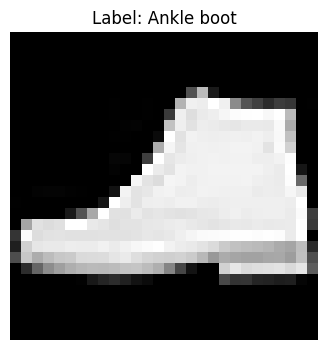

In [6]:
index = 42
plt.figure(figsize=(4,4))
plt.imshow(train_images[index], cmap='gray')
plt.title(f"Label: {class_names[train_labels[index]]}")
plt.axis('off')
plt.show()


**✨ Make It Shine: Normalise the Pixels**

Pixel values are between 0 and 255. We divide by 255 so all values are between 0 and 1.

In [7]:
train_images = train_images / 255.0
valid_images = valid_images / 255.0


> Think of this like resizing ingredients in a recipe — smaller, easier chunks for the brain to digest!

**🧠 Build the Brain (Neural Network)**

A neural network has layers — like layers of understanding 👓



In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten image to 1D
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(10)  # Output layer: one for each class
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**🧾 8. Model Summary**

Let’s take a look under the hood. What does this brain look like?

In [9]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**⚙️ Compile the Model**

Time to choose how the model learns — like choosing a study plan!

In [10]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


**🏋️ Train the Brain!**

Let’s teach it with the training data. This is where learning happens. 🎓

In [11]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7801 - loss: 0.6414 - val_accuracy: 0.8572 - val_loss: 0.4008
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8631 - loss: 0.3911 - val_accuracy: 0.8658 - val_loss: 0.3662
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8747 - loss: 0.3465 - val_accuracy: 0.8655 - val_loss: 0.3614
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8820 - loss: 0.3211 - val_accuracy: 0.8767 - val_loss: 0.3330
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8901 - loss: 0.3017 - val_accuracy: 0.8817 - val_loss: 0.3287
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8990 - loss: 0.2781 - val_accuracy: 0.8785 - val_loss: 0.3445
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9007 - loss: 0.2668 - val_accuracy: 0.8800 - val_loss: 0.3226
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9031 - loss: 0.2594 - 

**📊 Test on New Clothes**

Let’s test how our AI performs on unseen clothes (validation set).

In [12]:
test_loss, test_accuracy = model.evaluate(valid_images, valid_labels)
print(f"Test Accuracy: {test_accuracy:.2%}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8834 - loss: 0.3339
Test Accuracy: 88.18%


**🔮 Predict the Fashion Item**

Now let’s turn it into a fashion psychic 🔮👚👠


In [13]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

predictions = probability_model.predict(valid_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**🖼️ Let’s See What It Thinks!**

We’ll visualize the prediction + actual label.

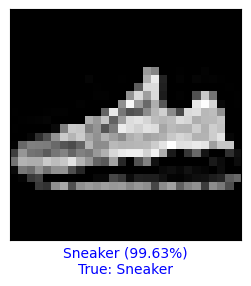

In [14]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

    predicted_label = np.argmax(predictions_array)
    confidence = 100 * np.max(predictions_array)

    colour = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({confidence:.2f}%)\nTrue: {class_names[true_label]}", color=colour)

index = 6174
plt.figure(figsize=(6,3))
plot_image(index, predictions[index], valid_labels, valid_images)
plt.show()


**🔍 View Multiple Predictions in One Grid**

Let’s display a 3x3 grid of predictions to see how well the model is doing. ✅❌

In [15]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

    predicted_label = np.argmax(predictions_array)
    confidence = 100 * np.max(predictions_array)

    colour = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({confidence:.2f}%)\nTrue: {class_names[true_label]}", color=colour)


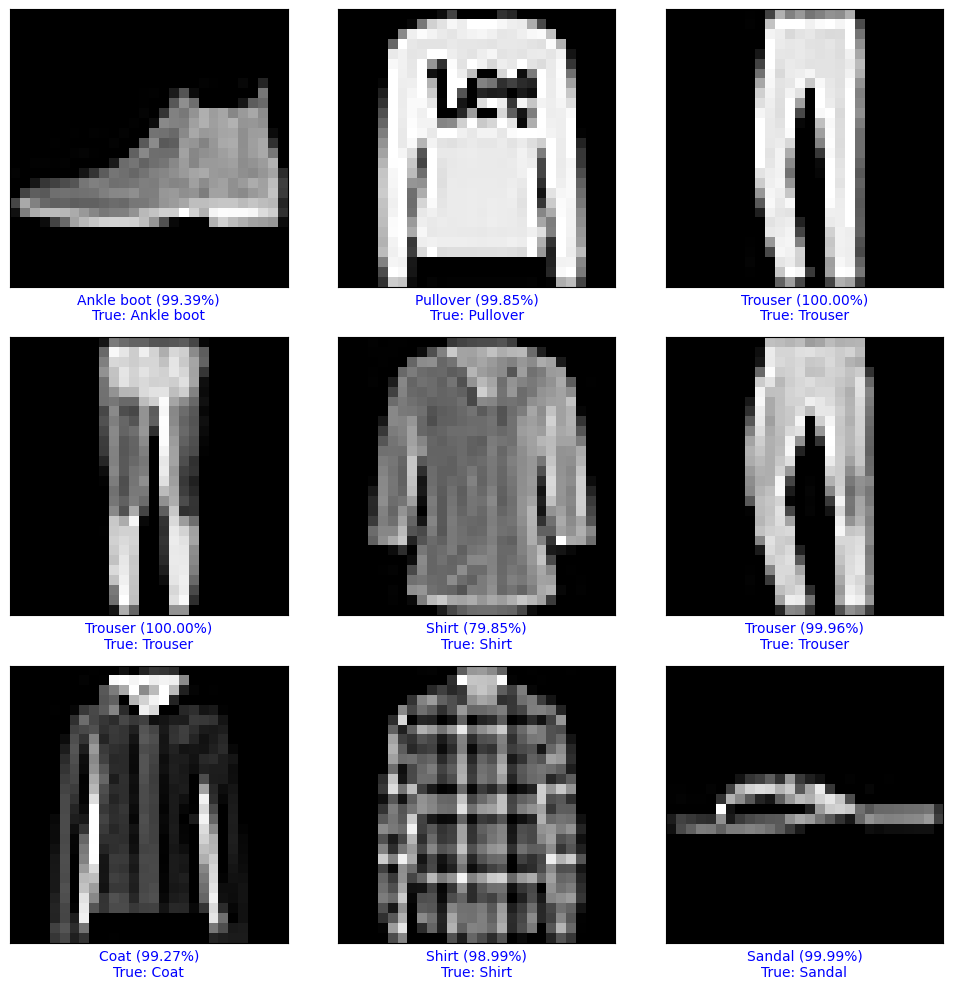

In [16]:
def plot_multiple_predictions(images, labels, predictions, class_names, num=9):
    plt.figure(figsize=(10, 10))
    for i in range(num):
        plt.subplot(3, 3, i + 1)
        plot_image(i, predictions, labels, images)
    plt.tight_layout()
    plt.show()

# Show predictions for the first 9 images
plot_multiple_predictions(valid_images, valid_labels, predictions, class_names)


**🎉 You Just Built a Tiny Brain! 🧠**

You taught a neural network to see fashion.

It now recognises trousers from T-shirts and boots from bags.

And you did it with a few lines of Python + TensorFlow!

🤖 Fun Fact: If you showed this model to someone in the 1950s, they’d think you were a wizard.